In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
from collections import OrderedDict

import matplotlib.pyplot as plt
import torchvision.datasets as datasets
from torchvision.transforms import ToTensor

In [2]:
def train_one_epoch(epoch_index):
    total_loss = 0.

    # Here, we use enumerate(training_loader) instead of
    # iter(training_loader) so that we can track the batch
    # index and do some intra-epoch reporting
    for i, data in enumerate(train_data_loader):
        # Every data instance is an input + label pair
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Zero your gradients for every batch!
        optimizer.zero_grad()

        # Make predictions for this batch
        outputs = model(inputs)

        # Compute the loss and its gradients
        loss = loss_fn(outputs, labels)
        loss.backward()

        # Adjust learning weights
        optimizer.step()

        # Gather data and report
        total_loss += loss.item()

    return total_loss/(len(train_data_loader) * batch_size)

In [5]:
class CNNClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        #self.w = torch.nn.Parameter(torch.rand([1]))
        #self.b = torch.nn.Parameter(torch.rand([1]))


        self.net =nn.Sequential(nn.Conv2d(1,64,kernel_size=3),
                                nn.ReLU(),
                                nn.MaxPool2d((2,2), stride=2),
                                nn.Conv2d(64, 128, kernel_size=3),
                                nn.ReLU(),
                                nn.MaxPool2d((2,2), stride=2),
                                nn.Conv2d(128, 64, kernel_size=3),
                                nn.ReLU(),
                                nn.MaxPool2d((2, 2), stride=2)
        )
        self.classification_head = nn.Sequential(nn.Linear(64, 20, bias=True),
                                nn.ReLU(),
                                nn.Linear(20, 10, bias=True))

    def forward(self, x):
        features = self.net(x)
        return self.classification_head(features.view(batch_size,-1))

In [6]:
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform = ToTensor())
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform = ToTensor())

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|█████████████████████████████| 9912422/9912422 [00:15<00:00, 636276.17it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|█████████████████████████████████| 28881/28881 [00:00<00:00, 122449.58it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|█████████████████████████████| 1648877/1648877 [00:01<00:00, 906916.39it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████████████████████████████| 4542/4542 [00:00<00:00, 2819376.76it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [7]:
batch_size = 4
train_data_loader = DataLoader(mnist_trainset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(mnist_testset, batch_size=batch_size, shuffle=False)

#Just to display a sample image from data loader
#and the corresponding label
# images, labels = next(iter(train_data_loader))
# plt.imshow(images[0].reshape(28,28), cmap="gray")
# plt.title(labels[0])
# plt.show()

#Find if CUDA is available to load the model and device
# on to the available device CPU/GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the model to GPU
model = CNNClassifier().to(device)
print(model)

CNNClassifier(
  (net): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classification_head): Sequential(
    (0): Linear(in_features=64, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=10, bias=True)
  )
)


In [10]:
total_params = 0
for name, param in model.named_parameters():
    print(name)
    params = param.numel()
    print(params)
    total_params += params
print("Total Parameters:{}".format(total_params))

# add the criterion which is the MSELoss
loss_fn = torch.nn.CrossEntropyLoss()
# Optimizers specified in the torch.optim package
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

print("Mode's state_dict:")
for param_tensor in model.state_dict().keys():
    print(param_tensor,"\t",model.state_dict()[param_tensor].size())
print()
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name,"\t",optimizer.state_dict()[var_name])

EPOCHS = 10

net.0.weight
576
net.0.bias
64
net.3.weight
73728
net.3.bias
128
net.6.weight
73728
net.6.bias
64
classification_head.0.weight
1280
classification_head.0.bias
20
classification_head.2.weight
200
classification_head.2.bias
10
Total Parameters:149798
Mode's state_dict:
net.0.weight 	 torch.Size([64, 1, 3, 3])
net.0.bias 	 torch.Size([64])
net.3.weight 	 torch.Size([128, 64, 3, 3])
net.3.bias 	 torch.Size([128])
net.6.weight 	 torch.Size([64, 128, 3, 3])
net.6.bias 	 torch.Size([64])
classification_head.0.weight 	 torch.Size([20, 64])
classification_head.0.bias 	 torch.Size([20])
classification_head.2.weight 	 torch.Size([10, 20])
classification_head.2.bias 	 torch.Size([10])

Optimizer's state_dict:
state 	 {}
param_groups 	 [{'lr': 0.001, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'maximize': False, 'foreach': None, 'differentiable': False, 'params': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}]


EPOCH 1:
LOSS train 0.016541245499313958
EPOCH 2:
LOSS train 0.015185664564063147
EPOCH 3:
LOSS train 0.014274225390376902
EPOCH 4:
LOSS train 0.01326578311847464
EPOCH 5:
LOSS train 0.012536333480920552
EPOCH 6:
LOSS train 0.011968417880607702
EPOCH 7:
LOSS train 0.011236892444875638
EPOCH 8:
LOSS train 0.010562954734120835
EPOCH 9:
LOSS train 0.01005520884301275
EPOCH 10:
LOSS train 0.009497167339800796
True label:tensor([7, 2, 1, 0], device='cuda:0')
Predicted: tensor([7, 2, 1, 0], device='cuda:0')
True label:tensor([4, 1, 4, 9], device='cuda:0')
Predicted: tensor([4, 1, 4, 9], device='cuda:0')
True label:tensor([5, 9, 0, 6], device='cuda:0')
Predicted: tensor([5, 9, 0, 6], device='cuda:0')
True label:tensor([9, 0, 1, 5], device='cuda:0')
Predicted: tensor([9, 0, 1, 5], device='cuda:0')
True label:tensor([9, 7, 3, 4], device='cuda:0')
Predicted: tensor([9, 7, 3, 4], device='cuda:0')
True label:tensor([9, 6, 6, 5], device='cuda:0')
Predicted: tensor([9, 6, 6, 5], device='cuda:0')
Tru

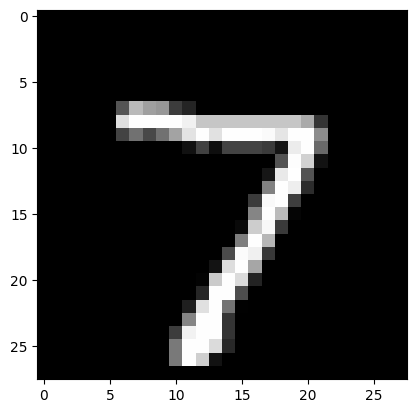

In [11]:
for epoch in range(EPOCHS):
    print('EPOCH {}:'.format(epoch + 1))

    # Make sure gradient tracking is on, and do a pass over the data
    model.train(True)
    avg_loss = train_one_epoch(epoch)

    running_vloss = 0.0

    # Set the model to evaluation mode, disabling dropout and using population
    # statistics for batch normalization.
    model.eval()
    # Disable gradient computation and reduce memory consumption.
    print('LOSS train {}'.format(avg_loss ))

images, true_labels = next(iter(test_loader))
plt.imshow(images[0].reshape(28,28), cmap="gray")
model.eval()

correct = 0
total = 0
for i, vdata in enumerate(test_loader):
    tinputs, tlabels = vdata
    tinputs = tinputs.to(device)
    tlabels = tlabels.to(device)
    toutputs = model(tinputs)
    #Select the predicted class label which has the
    # highest value in the output layer
    _, predicted = torch.max(toutputs, 1)
    print("True label:{}".format(tlabels))
    print('Predicted: {}'.format(predicted))
    # Total number of labels
    total += tlabels.size(0)

    # Total correct predictions
    correct += (predicted == tlabels).sum()

accuracy = 100.0 * correct / total
print("The overall accuracy is {}".format(accuracy))

In [12]:
torch.save(model,"./ModelFiles/model.pt")